## Banking Marketing Data 

In [1]:
# Imports
import pandas as pd
import seaborn as sns
import numpy as np
import csv
import random as rn
import matplotlib.pyplot as plt
from statistics import mean
%matplotlib inline

from sklearn import svm
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score

import os

## Loading Data

In [2]:
bank = pd.read_csv('data/bank/bank-full.csv', sep = ';')

In [3]:
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [4]:
bank.shape

(45211, 17)

## Transforming Data

In [5]:
# X Values
X_labels = LabelEncoder()
bank['job'] = X_labels.fit_transform(bank['job'])
bank['marital'] = X_labels.fit_transform(bank['marital'])
bank['education'] = X_labels.fit_transform(bank['education'])
bank['default'] = X_labels.fit_transform(bank['default'])
bank['housing'] = X_labels.fit_transform(bank['housing'])
bank['loan'] = X_labels.fit_transform(bank['loan'])
bank['contact'] = X_labels.fit_transform(bank['contact'])
bank['month'] = X_labels.fit_transform(bank['month'])
bank['poutcome'] = X_labels.fit_transform(bank['poutcome'])
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,4,1,2,0,2143,1,0,2,5,8,261,1,-1,0,3,no
1,44,9,2,1,0,29,1,0,2,5,8,151,1,-1,0,3,no
2,33,2,1,1,0,2,1,1,2,5,8,76,1,-1,0,3,no
3,47,1,1,3,0,1506,1,0,2,5,8,92,1,-1,0,3,no
4,33,11,2,3,0,1,0,0,2,5,8,198,1,-1,0,3,no


In [6]:
# Y Values
bank['y'] = bank['y'].map({'yes': 1,'no': 0})

## Classifiers

In [7]:
Bank_LR_acc = []
Bank_SVM_acc = []
Bank_RF_acc = []
Bank_RF_CV_acc = []
Bank_KNN_acc = []

In [8]:
def logistic_regression(X_train, X_test, Y_train, Y_test):
    LR = LogisticRegression()
    LR.fit(X_train, Y_train)
    LR_acc = LR.score(X_test, Y_test)
    return LR_acc

In [9]:
def svm(X_train, X_test, Y_train, Y_test):
    SVM = SVC()
    SVM.fit(X_train, Y_train)
    SVM_acc = SVM.score(X_test, Y_test)
    return SVM_acc

In [10]:
def random_forest(X_train, X_test, Y_train, Y_test):
    RFC = RandomForestClassifier(n_estimators = 200)
    RFC.fit(X_train, Y_train)
    RFC_acc = RFC.score(X_test, Y_test)
    RF_eval = cross_val_score(estimator = RFC, X = X_train, y = Y_train, cv = 10)
    return RFC_acc, RF_eval.mean()

### Data Shuffle 1: 80/20 Split

In [11]:
X_bank = bank.drop('y', axis=1).values
Y_bank = bank['y'].values

In [12]:
X_bank_train1, X_bank_test1, Y_bank_train1, Y_bank_test1 = train_test_split(X_bank, Y_bank,
                                                                             test_size = 0.2, 
                                                                             shuffle = True)

In [13]:
# Logistic Regression for Bank Dataset 
LR_bank1_acc = logistic_regression(X_bank_train1, X_bank_test1, Y_bank_train1, Y_bank_test1)
Bank_LR_acc.append(LR_bank1_acc)
Bank_LR_acc

/Users/Meyhaa/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[0.8865420767444432]

In [14]:
# SVM For Bank Dataset
SVM_bank1_acc = svm(X_bank_train1, X_bank_test1, Y_bank_train1, Y_bank_test1)
Bank_SVM_acc.append(SVM_bank1_acc)
Bank_SVM_acc

/Users/Meyhaa/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


[0.8793541966161672]

In [15]:
# Random Forest for Bank Dataset
RF_bank1_acc = random_forest(X_bank_train1, X_bank_test1, Y_bank_train1, Y_bank_test1)
Bank_RF_acc.append(RF_bank1_acc[0])
Bank_RF_CV_acc.append(RF_bank1_acc[1])
Bank_RF_acc, Bank_RF_CV_acc

([0.9041247373659184], [0.9061603223837288])

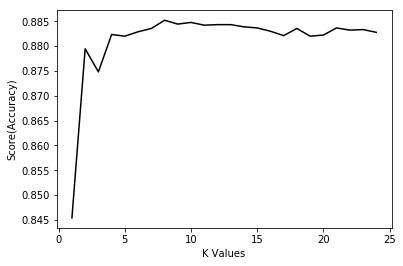

In [16]:
# KNN Model for Bank Dataset
scores1 = []
for val in range(1,25):
    KNNfind = KNeighborsClassifier(n_neighbors = val)
    KNNfind.fit(X_bank_train1,Y_bank_train1)
    scores1.append(KNNfind.score(X_bank_test1,Y_bank_test1))

plt.plot(range(1,25),scores1,color="black")
plt.xlabel("K Values")
plt.ylabel("Score(Accuracy)")
plt.show()

In [17]:
Bank_KNN_acc.append(max(scores1))
Bank_KNN_acc

[0.8852150834899922]

In [18]:
'Optimal n is: ' + str(scores1.index(max(scores1))+ 1)

'Optimal n is: 8'

### Data Shuffle 2: 50/50 Split

In [19]:
X_bank_train2, X_bank_test2, Y_bank_train2, Y_bank_test2 = train_test_split(X_bank, Y_bank,
                                                                             test_size = 0.5, 
                                                                             shuffle = True)

In [20]:
# Logistic Regression for Bank Dataset 
LR_bank2_acc = logistic_regression(X_bank_train2, X_bank_test2, Y_bank_train2, Y_bank_test2)
Bank_LR_acc.append(LR_bank2_acc)
Bank_LR_acc

/Users/Meyhaa/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[0.8865420767444432, 0.8929930107051225]

In [21]:
# SVM For Bank Dataset
SVM_bank2_acc = svm(X_bank_train2, X_bank_test2, Y_bank_train2, Y_bank_test2)
Bank_SVM_acc.append(SVM_bank2_acc)
Bank_SVM_acc

/Users/Meyhaa/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


[0.8793541966161672, 0.8847651066088649]

In [22]:
# Random Forest for Bank Dataset
RF_bank2_acc = random_forest(X_bank_train2, X_bank_test2, Y_bank_train2, Y_bank_test2)
Bank_RF_acc.append(RF_bank2_acc[0])
Bank_RF_CV_acc.append(RF_bank2_acc[1])
Bank_RF_acc, Bank_RF_CV_acc

([0.9041247373659184, 0.9074139608953375],
 [0.9061603223837288, 0.9011282265911916])

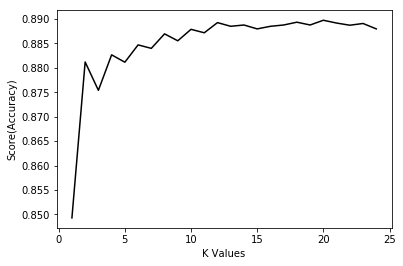

In [23]:
# KNN Model for Bank Dataset
scores2 = []
for val in range(1,25):
    KNNfind = KNeighborsClassifier(n_neighbors = val)
    KNNfind.fit(X_bank_train2,Y_bank_train2)
    scores2.append(KNNfind.score(X_bank_test2,Y_bank_test2))

plt.plot(range(1,25),scores2,color="black")
plt.xlabel("K Values")
plt.ylabel("Score(Accuracy)")
plt.show()

In [24]:
Bank_KNN_acc.append(max(scores2))
Bank_KNN_acc

[0.8852150834899922, 0.8897195434840308]

In [25]:
'Optimal n is: ' + str(scores2.index(max(scores2))+ 1)

'Optimal n is: 20'

### Data Shuffle 3: 20/80 Split

In [26]:
X_bank_train3, X_bank_test3, Y_bank_train3, Y_bank_test3 = train_test_split(X_bank, Y_bank,
                                                                             test_size = 0.8, 
                                                                             shuffle = True)

In [27]:
# Logistic Regression for Bank Dataset 
LR_bank3_acc = logistic_regression(X_bank_train3, X_bank_test3, Y_bank_train3, Y_bank_test3)
Bank_LR_acc.append(LR_bank3_acc)
Bank_LR_acc

/Users/Meyhaa/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[0.8865420767444432, 0.8929930107051225, 0.8900716082833365]

In [28]:
# SVM For Bank Dataset
SVM_bank3_acc = svm(X_bank_train3, X_bank_test3, Y_bank_train3, Y_bank_test3)
Bank_SVM_acc.append(SVM_bank3_acc)
Bank_SVM_acc

/Users/Meyhaa/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


[0.8793541966161672, 0.8847651066088649, 0.8836849235533192]

In [29]:
# Random Forest for Bank Dataset
RF_bank3_acc = random_forest(X_bank_train3, X_bank_test3, Y_bank_train3, Y_bank_test3)
Bank_RF_acc.append(RF_bank3_acc[0])
Bank_RF_CV_acc.append(RF_bank3_acc[1])
Bank_RF_acc, Bank_RF_CV_acc

([0.9041247373659184, 0.9074139608953375, 0.9021814260831098],
 [0.9061603223837288, 0.9011282265911916, 0.9024540409719846])

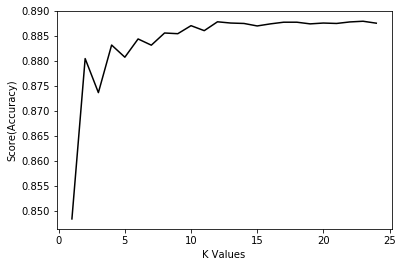

In [30]:
# KNN Model for Bank Dataset
scores3 = []
for val in range(1,25):
    KNNfind = KNeighborsClassifier(n_neighbors = val)
    KNNfind.fit(X_bank_train3,Y_bank_train3)
    scores3.append(KNNfind.score(X_bank_test3,Y_bank_test3))

plt.plot(range(1,25),scores3,color="black")
plt.xlabel("K Values")
plt.ylabel("Score(Accuracy)")
plt.show()

In [31]:
Bank_KNN_acc.append(max(scores3))
Bank_KNN_acc

[0.8852150834899922, 0.8897195434840308, 0.887970361359175]

In [32]:
'Optimal n is: ' + str(scores3.index(max(scores3))+ 1)

'Optimal n is: 23'

### Accuracies 

#### Logistic Regression

In [33]:
Bank_LR_acc

[0.8865420767444432, 0.8929930107051225, 0.8900716082833365]

In [34]:
# Average
round(mean(Bank_LR_acc), 4)

0.8899

#### SVM

In [35]:
Bank_SVM_acc

[0.8793541966161672, 0.8847651066088649, 0.8836849235533192]

In [36]:
# Average
round(mean(Bank_SVM_acc), 4)

0.8826

#### Random Forest

In [37]:
Bank_RF_acc

[0.9041247373659184, 0.9074139608953375, 0.9021814260831098]

In [38]:
# Average
round(mean(Bank_RF_acc), 4)

0.9046

In [39]:
# With Cross Validation
Bank_RF_CV_acc

[0.9061603223837288, 0.9011282265911916, 0.9024540409719846]

In [40]:
# Average
round(mean(Bank_RF_CV_acc), 4)

0.9032

#### KNN

In [41]:
Bank_KNN_acc

[0.8852150834899922, 0.8897195434840308, 0.887970361359175]

In [42]:
# Average
round(mean(Bank_KNN_acc), 4)

0.8876